In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
sub = pd.read_csv("sample_submission.csv.zip")
test = pd.read_csv("test.csv.zip")
train = pd.read_csv("train.csv.zip")

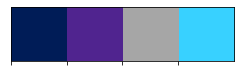

In [15]:
colors = ['#001c57','#50248f','#a6a6a6','#38d1ff']
sns.palplot(sns.color_palette(colors))

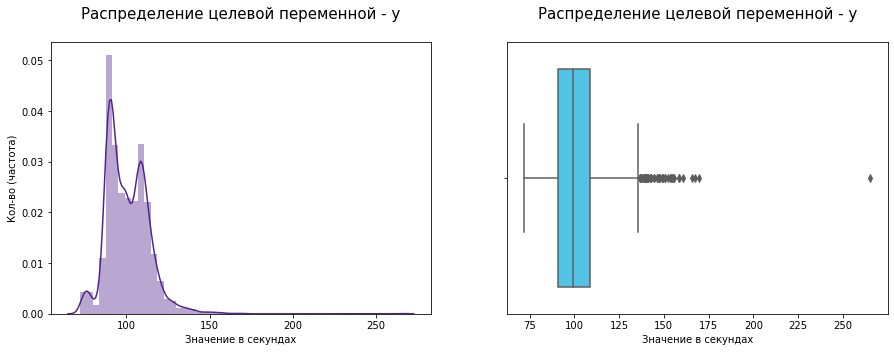

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train.y.values, bins=50, color=colors[1])
plt.title('Распределение целевой переменной - y\n',fontsize=15)
plt.xlabel('Значение в секундах'); plt.ylabel('Кол-во (частота)');

plt.subplot(122)
sns.boxplot(train.y.values, color=colors[3])
plt.title('Распределение целевой переменной - y\n',fontsize=15)
plt.xlabel('Значение в секундах');

In [7]:
test.head(4)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
sub.head(6)

,ID,y
0,1,100.669318
1,2,100.669318
2,3,100.669318
3,4,100.669318
4,5,100.669318
5,8,100.669318


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [10]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [11]:
train.dtypes[train.dtypes=='float']

y    float64
dtype: object

In [12]:
train.dtypes[train.dtypes=='object']

X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object

In [13]:
obj = train.dtypes[train.dtypes=='object'].index
for i in obj:
    print(i, train[i].unique())

X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 ['d' 'b' 'c' 'a']
X5 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']


Пропущенные значения

In [17]:
train.isna().sum()[train.isna().sum()>0]

Series([], dtype: int64)

Категориальные переменные

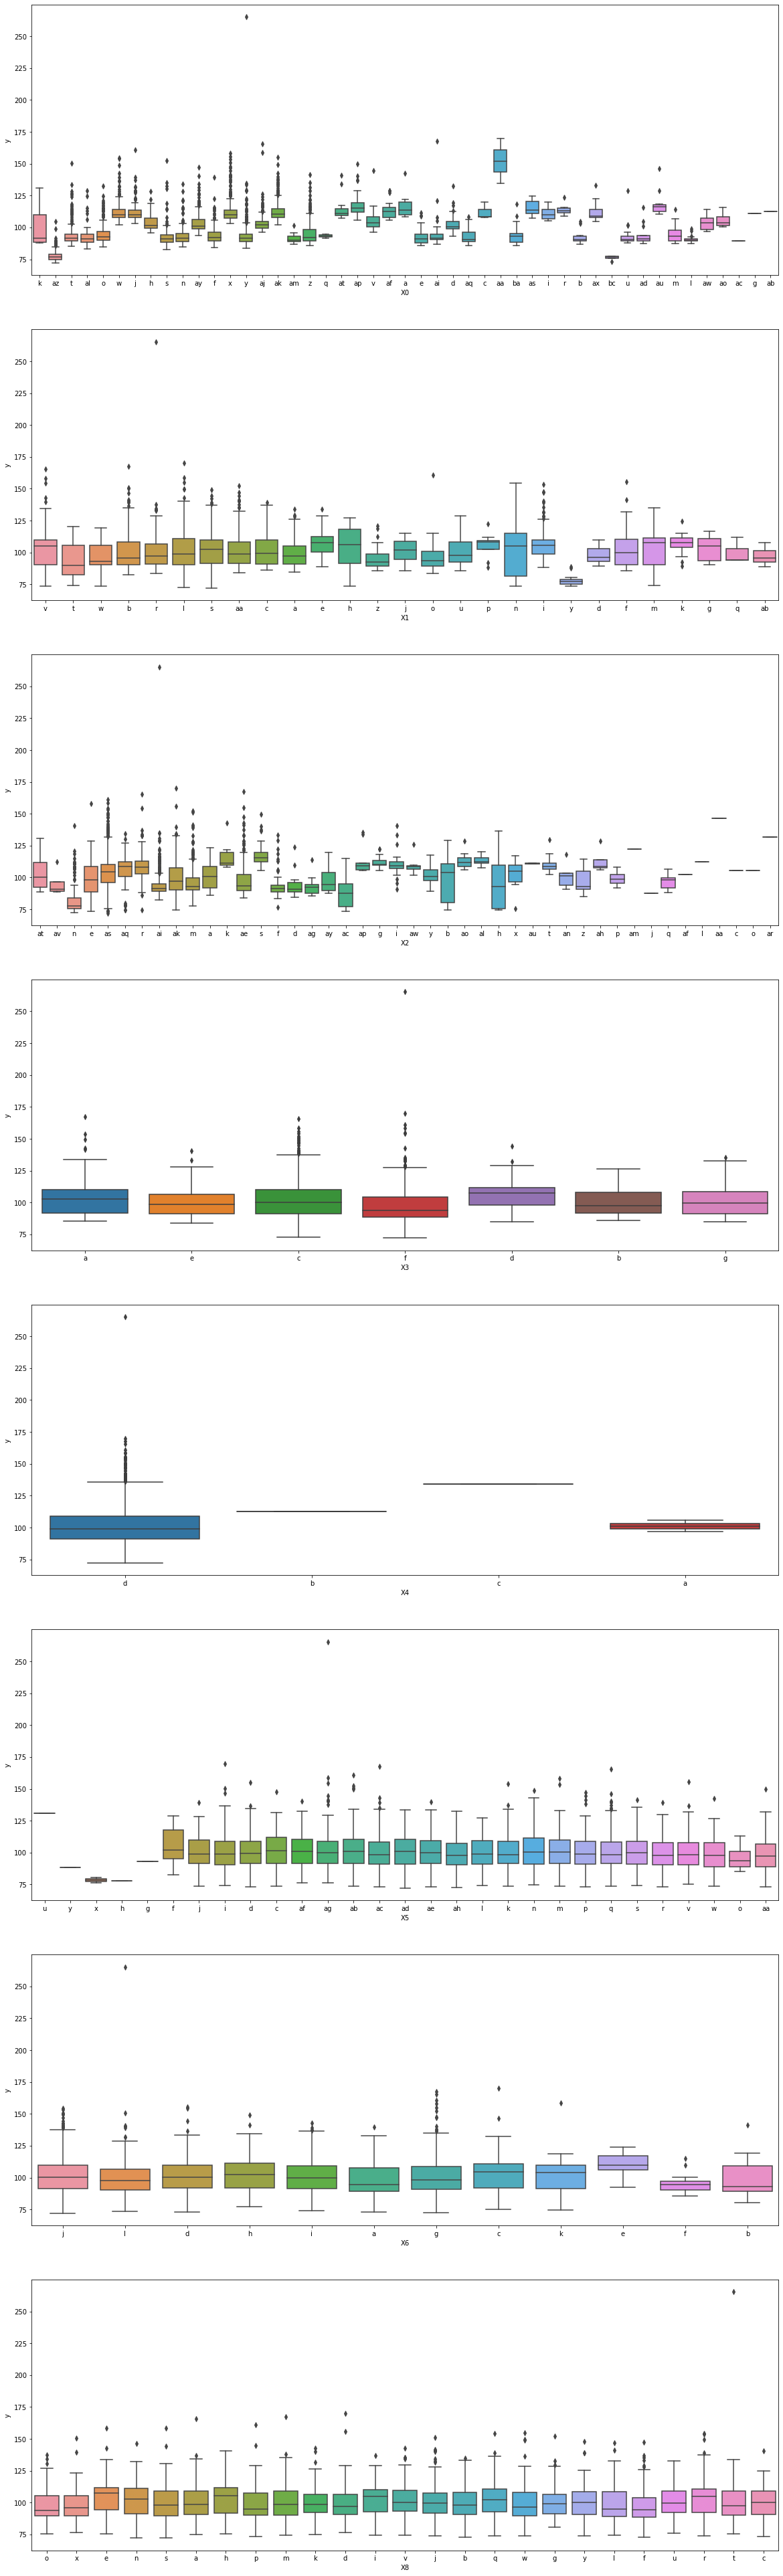

In [18]:
fig,ax = plt.subplots(len(obj), figsize=(20,70))

for i, col in enumerate(obj):
    sns.boxplot(x=col, y='y', data=train, ax=ax[i])

Числовые переменные

In [28]:
num = train.dtypes[train.dtypes=='int64'].index[1:]

In [29]:
num

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

Мы имеем набор числовых переменных, где значение задано 1, либо 0, поэтому нет необходимости проводить объемный ананлиз. В данном случае нам должно быть интересно, меняется ли значение показателей внутри переменных, для этого исследуем дисперсию данных переменных, используем при этом функцию var(), и выберем только те, где дисперсия нулевая (то есть всегда 0, либо 1 на всем датасете в разрезе переменной)



In [30]:
nan_num = []
for i in num:
    if (train[i].var()==0):
        print(i, train[i].var())
        nan_num.append(i)

X11 0.0
X93 0.0
X107 0.0
X233 0.0
X235 0.0
X268 0.0
X289 0.0
X290 0.0
X293 0.0
X297 0.0
X330 0.0
X347 0.0


In [35]:
train['X11'].unique(), train['X347'].unique()

(array([0], dtype=int64), array([0], dtype=int64))

In [38]:
train['X100'].unique(), train['X100'].value_counts()

(array([0, 1], dtype=int64),
 1    2905
 0    1304
 Name: X100, dtype: int64)

По-хорошему такие фичи можно и дропнуть, но поскольку мы сравниваем подходы из коробы с AutoML, пусть будет честный бой и оставим, как есть.

In [ ]:
# train = train.drop(columns=nan_num, axis=1)

_________________

In [39]:
train["set"] = "train"
train.loc[(train['ID'] > 6000), 'set'] = 'va'
train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,set
0,0,130.81,k,v,at,a,d,u,j,o,...,0,1,0,0,0,0,0,0,0,train
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,0,train
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,1,0,0,0,train
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,train
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,0,0,0,0,0,0,0,0,0,va
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,1,0,0,0,0,0,0,0,0,va
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,1,0,0,0,0,0,0,0,va
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,va


<AxesSubplot:xlabel='y', ylabel='Density'>

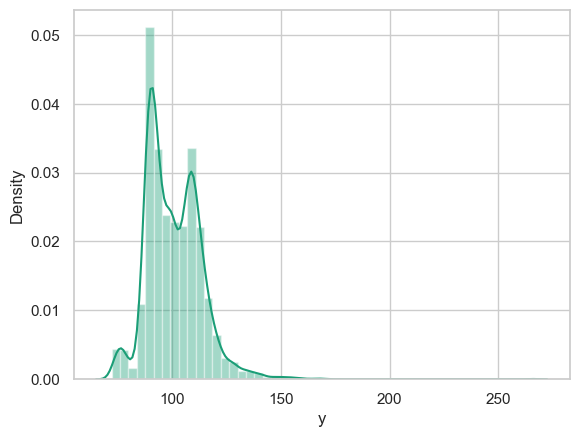

In [40]:
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Dark2')

sns.distplot(train.y)

Начнём объединять данные в один датасет, и добавим ещё валидационные данные, из тренировочных.

In [41]:
test["set"] = "test"
test_id = test.ID

In [42]:
data_all = pd.DataFrame()
data_all = pd.concat([train,test])
data_all = data_all.sort_values(by='ID', ascending=True)
#data_all = data_all.drop(columns = "ID")
data_all = data_all.reset_index(drop=True)
data_all

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,set
0,0,130.81,k,v,at,a,d,u,j,o,...,0,1,0,0,0,0,0,0,0,train
1,1,NaN,az,v,n,f,d,t,a,w,...,0,0,1,0,0,0,0,0,0,test
2,2,NaN,t,b,ai,a,d,b,g,y,...,0,1,0,0,0,0,0,0,0,test
3,3,NaN,az,v,as,f,d,a,j,j,...,0,0,1,0,0,0,0,0,0,test
4,4,NaN,az,l,n,f,d,z,l,n,...,0,0,1,0,0,0,0,0,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,8413,NaN,y,v,as,f,d,aa,d,w,...,0,0,0,0,0,0,0,0,0,test
8414,8414,NaN,ak,v,as,a,d,aa,c,q,...,0,1,0,0,0,0,0,0,0,test
8415,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,va
8416,8416,NaN,t,aa,ai,c,d,aa,g,r,...,0,0,0,0,0,0,0,0,0,test


In [43]:
obj

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [44]:
enc = data_all[obj]
enc

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,az,v,n,f,d,t,a,w
2,t,b,ai,a,d,b,g,y
3,az,v,as,f,d,a,j,j
4,az,l,n,f,d,z,l,n
...,...,...,...,...,...,...,...,...
8413,y,v,as,f,d,aa,d,w
8414,ak,v,as,a,d,aa,c,q
8415,al,r,e,f,d,aa,l,u
8416,t,aa,ai,c,d,aa,g,r


### LabelEncoding

In [45]:
from sklearn.preprocessing import LabelEncoder #Library for LabelEncoding

for c in enc:
    le = LabelEncoder()
    le.fit(enc[c])
    enc[c] = le.transform(enc[c])
    
enc

,X0,X1,X2,X3,X4,X5,X6,X8
0,37,23,20,0,3,27,9,14
1,24,23,38,5,3,26,0,22
2,46,3,9,0,3,9,6,24
3,24,23,19,5,3,0,9,9
4,24,13,38,5,3,32,11,13
...,...,...,...,...,...,...,...,...
8413,51,23,19,5,3,1,3,22
8414,10,23,19,0,3,1,2,16
8415,11,19,29,5,3,1,11,20
8416,46,1,9,2,3,1,6,17


Сделаем общий датасет и покажем.

In [46]:
data_all = data_all.drop(['X0','X1','X2','X3','X4','X5','X6','X8'], axis=1)
data_all = data_all.join(enc)
data_all

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X385,set,X0,X1,X2,X3,X4,X5,X6,X8
0,0,130.81,0,0,0,1,0,0,0,0,...,0,train,37,23,20,0,3,27,9,14
1,1,NaN,0,0,0,0,0,0,0,0,...,0,test,24,23,38,5,3,26,0,22
2,2,NaN,0,0,0,0,0,0,0,0,...,0,test,46,3,9,0,3,9,6,24
3,3,NaN,0,0,0,0,1,0,0,0,...,0,test,24,23,19,5,3,0,9,9
4,4,NaN,0,0,0,0,0,0,0,0,...,0,test,24,13,38,5,3,32,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,8413,NaN,0,0,0,0,1,0,0,0,...,0,test,51,23,19,5,3,1,3,22
8414,8414,NaN,0,0,0,1,1,0,0,0,...,0,test,10,23,19,0,3,1,2,16
8415,8415,87.48,0,0,0,0,1,0,0,0,...,0,va,11,19,29,5,3,1,11,20
8416,8416,NaN,0,0,0,0,0,0,0,0,...,0,test,46,1,9,2,3,1,6,17


Сколько у нас данных в каждом в трейне, тесте и валидационные?

In [47]:
n_tr = (data_all.set == 'train').sum()
n_va = (data_all.set == 'va').sum()
n_te = (data_all.set == 'test').sum()
n = [n_tr, n_va, n_te]
n

[2994, 1215, 4209]

(-1.1, 1.1, -1.1007078092231275, 1.1148639936856752)

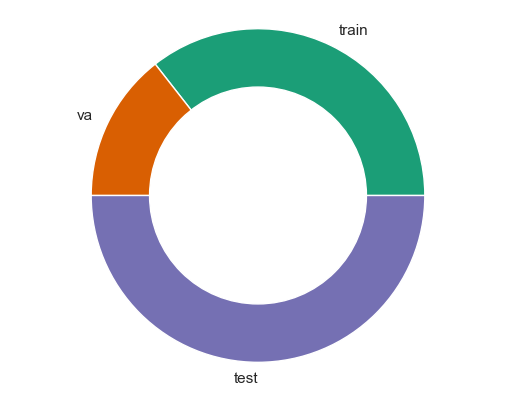

In [48]:
label = ["train","va","test"]

plt.pie(n, labels=label)
plt.gca().add_artist(plt.Circle((0, 0), 0.65, color='white'))
plt.axis('equal')

### Теперь снова разобъём данные, переведя их в нужные переменные, используя колонку 'set'

In [49]:
train_fit = pd.DataFrame()
train_fit = data_all.loc[data_all.set == "train"]

train_fit_x = train_fit.drop(columns = "y")
train_fit_x = train_fit_x.drop(columns = "set")
train_fit_y = train_fit.y


va_fit = pd.DataFrame()
va_fit = data_all.loc[data_all.set == "va"]

va_fit_x = va_fit.drop(columns = "y")
va_fit_x = va_fit_x.drop(columns = "set")
va_fit_y = va_fit.y


test_fit = pd.DataFrame()
test_fit = data_all.loc[data_all.set == "test"]

test_fit_x = test_fit.drop(['y', 'set'], axis=1)

In [51]:
pip install lightgbm

### LightGBM

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
%%time
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

categorical_features = ['X0','X1','X2','X3','X4','X5','X6','X8']

# Parameter setting
params = {
    "objective" : "regression",
    "metric" : "rmse",
    "num_leaves" : 40,
    "learning_rate" : 0.01,
    "bagging_fraction" : 0.8,
    "feature_fraction" : 0.8, # Use only 〇% of features
    "bagging_frequency" : 6,
    "bagging_seed" : 42,
    "verbosity" : -1, # Whether to display the progress during learning
    "seed": 42
}

train_lgb = lgb.Dataset(train_fit_x,
                        label=train_fit_y,
                        categorical_feature=categorical_features)

va_lgb = lgb.Dataset(va_fit_x,
                     label=va_fit_y,
                     categorical_feature=categorical_features)

evals_result = {}

model_lgb = lgb.train(params, train_set = train_lgb,
                  num_boost_round = 10000,
                  valid_sets=[train_lgb, va_lgb], 
                  early_stopping_rounds=200, 
                  verbose_eval=1000,
                  evals_result=evals_result)

[LightGBM] [Warning] Unknown parameter: bagging_frequency
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[238]	training's rmse: 7.59102	valid_1's rmse: 7.40165
Wall time: 8.84 s


In [53]:
va_y = va_fit_y

pred = model_lgb.predict(va_fit_x, num_iteration=model_lgb.best_iteration)

columns = ["y"]
pred_d = pd.DataFrame(data=pred, columns = columns)

# RSMLE score
score_RMSLE = np.sqrt(mean_squared_log_error(va_y, pred_d["y"]))
print("---------------RMSLE-score----------------")
print(score_RMSLE)

# RSMLE score
score_R2 = r2_score(va_y, pred_d["y"])
print("---------------R2-score----------------")
score_R2

---------------RMSLE-score----------------
0.06970972958019966
---------------R2-score----------------


0.6039484021972513

<AxesSubplot:xlabel='y', ylabel='y'>

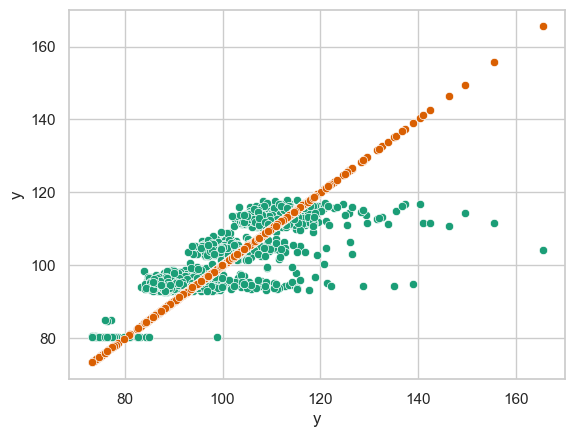

In [54]:
columns = ["y"]
va_fit_d = pd.DataFrame(data=va_y, columns = columns)
va_fit_d = va_fit_d.reset_index(drop=True)

sns.scatterplot(x=va_fit_d['y'], y=pred_d['y'])
sns.scatterplot(x=va_fit_d['y'], y=va_fit_d['y']) #perfect fitting line

<AxesSubplot:xlabel='y', ylabel='Density'>

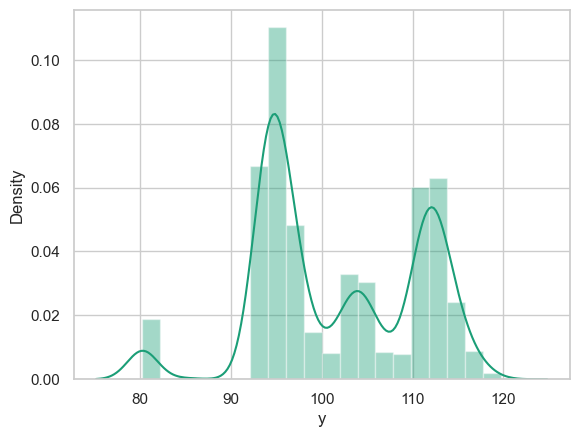

In [55]:
# predict
pred = model_lgb.predict(test_fit_x)

pred_df = pd.DataFrame()
pred_df["y"] = pred
sns.distplot(pred_df.y)

In [75]:
va_pred = model_lgb.predict(va_fit_x)
print('\nЦелевое значение в валидационной выборке, реальное, предсказанное и отклонение:')
pd.DataFrame({'True': va_fit_y.round(2), 'Predicted': va_pred.round(2), 'Deviation, %': (va_pred - va_fit_y)/va_fit_y}).round(2)


Целевое значение в валидационной выборке, реальное, предсказанное и отклонение:


,True,Predicted,"Deviation, %"
6005,88.54,95.48,0.08
6008,106.61,114.46,0.07
6009,92.66,94.07,0.02
6010,111.04,114.31,0.03
6013,99.64,98.69,-0.01
...,...,...,...
8405,107.39,113.04,0.05
8406,108.77,111.90,0.03
8412,109.22,111.35,0.02
8415,87.48,94.39,0.08


In [71]:
print('\nМетрики модели:\n')
print('MSE:', mean_squared_error(va_fit_y, va_pred).round(4))
print('MAE:', mean_absolute_error(va_fit_y, va_pred).round(4))


Метрики модели:

MSE: 54.7844
MAE: 5.63


### AdaBoostRegressor

In [59]:
from sklearn.linear_model import LinearRegression

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
from sklearn.ensemble import AdaBoostRegressor

In [60]:
params = {  'base_estimator': [LinearRegression()],
            'n_estimators': list(range(5,100,1)), 
            'learning_rate': [0.001, 0.01, 0.1, 1, 10],
            'loss': ['linear','square','exponential'],
            'random_state': [0]}

ABR = RandomizedSearchCV(AdaBoostRegressor(), params, cv = 10, n_jobs=-1, n_iter=10)
ABR = ABR.fit(train_fit_x, train_fit_y).best_estimator_

Оптимальные гиперпараметры после рандомного поиска нашей модели:

In [61]:
ABR

AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.001,
                  n_estimators=96, random_state=0)

In [76]:
va_pred = ABR.predict(va_fit_x)
print('\nЦелевое значение в валидационной выборке, реальное, предсказанное и отклонение:')
pd.DataFrame({'True': va_fit_y.round(2), 'Predicted': va_pred.round(2), 'Deviation, %': (va_pred - va_fit_y)/va_fit_y}).round(2)


Целевое значение в валидационной выборке, реальное, предсказанное и отклонение:


,True,Predicted,"Deviation, %"
6005,88.54,94.05,0.06
6008,106.61,111.37,0.04
6009,92.66,94.53,0.02
6010,111.04,116.68,0.05
6013,99.64,96.74,-0.03
...,...,...,...
8405,107.39,106.90,-0.00
8406,108.77,112.83,0.04
8412,109.22,112.29,0.03
8415,87.48,92.42,0.06


In [73]:
print('\nМетрики модели:\n')
print('MSE:', mean_squared_error(va_fit_y, va_pred).round(4))
print('MAE:', mean_absolute_error(va_fit_y, va_pred).round(4))


Метрики модели:

MSE: 60.7125
MAE: 5.9673


### KNeighborsRegressor

In [77]:
from sklearn.neighbors import DistanceMetric

In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [79]:
from sklearn.model_selection import StratifiedShuffleSplit

In [80]:
params = {   'n_neighbors': list(range(3,30,1)),
             'weights': ['uniform', 'distance'],
             'algorithm': ['brute'],
             'leaf_size': list(range(5,50,1)),
             'p': [1, 2],
             'metric': ['euclidian','manhattan','chebyshev','minkowski']}
  
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

KNR = RandomizedSearchCV(KNeighborsRegressor(), params, n_jobs=-1,  random_state=0, n_iter=10)
KNR = KNR.fit(train_fit_x, train_fit_y).best_estimator_

Оптимальные гиперпараметры после рандомного поиска нашей модели:

In [81]:
KNR

KNeighborsRegressor(algorithm='brute', leaf_size=35, metric='manhattan',
                    n_neighbors=16, weights='distance')

Для оптимальных гиперпараметров модели оценим качество:

In [83]:
va_pred = KNR.predict(va_fit_x)
print('\nЦелевое значение в валидационной выборке, реальное, предсказанное и отклонение:')
pd.DataFrame({'True': va_fit_y.round(2), 'Predicted': va_pred.round(2), 'Deviation, %': (va_pred - va_fit_y)/va_fit_y}).round(2)


Целевое значение в валидационной выборке, реальное, предсказанное и отклонение:


,True,Predicted,"Deviation, %"
6005,88.54,96.15,0.09
6008,106.61,104.54,-0.02
6009,92.66,100.11,0.08
6010,111.04,100.58,-0.09
6013,99.64,99.42,-0.00
...,...,...,...
8405,107.39,104.27,-0.03
8406,108.77,98.68,-0.09
8412,109.22,102.71,-0.06
8415,87.48,100.73,0.15


In [84]:
print('\nМетрики модели:\n')
print('MSE:', mean_squared_error(va_fit_y, va_pred).round(4))
print('MAE:', mean_absolute_error(va_fit_y, va_pred).round(4))


Метрики модели:

MSE: 116.7257
MAE: 8.6657


### AutoML - подход

In [113]:
!pip install h2o

  Created wheel for h2o: filename=h2o-3.32.1.3-py2.py3-none-any.whl size=164854348 sha256=b2408dbe60ac50db95c5b71f21b9c810743e0cb22b08bfd3c9e5abe16f7b9a04
  Stored in directory: c:\users\дмитрий\appdata\local\pip\cache\wheels\94\de\98\a3badf41ac2c2b02dc1a21c9b8f8d435b5eb68a52f9df8d3c1
Successfully built h2o


In [114]:
from h2o.automl import H2OAutoML

In [118]:
import h2o

In [121]:
#h2o.connect()

Connecting to H2O server at http://localhost:54321 ....... failed.


H2OConnectionError: Could not establish link to the H2O cloud http://localhost:54321 after 5 retries
[40:35.17] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001BE1E38B0D0>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))
[40:39.46] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001BE1ABB77C0>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))
[40:43.97] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001BE1E3EC580>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))
[40:48.81] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001BE1E3ECD30>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))
[40:53.66] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001BE1E3F5520>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))

In [120]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

aml.leader

H2OConnectionError: Not connected to a cluster. Did you run `h2o.connect()`?

In [ ]:
train_fit = pd.DataFrame()
train_fit = data_all.loc[data_all.set == "train"]

train_fit_x = train_fit.drop(columns = "y")
train_fit_x = train_fit_x.drop(columns = "set")
train_fit_y = train_fit.y


va_fit = pd.DataFrame()
va_fit = data_all.loc[data_all.set == "va"]

va_fit_x = va_fit.drop(columns = "y")
va_fit_x = va_fit_x.drop(columns = "set")
va_fit_y = va_fit.y


test_fit = pd.DataFrame()
test_fit = data_all.loc[data_all.set == "test"]

test_fit_x = test_fit.drop(['y', 'set'], axis=1)

In [122]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import a sample binary outcome train/test set into H2O
#train = #h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
#test = #h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
#x = train.columns
#y = "response"
#x.remove(y)

# For binary classification, response should be a factor
#train[y] = train[y].asfactor()
#test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=va_fit_x.columns, y=va_fit_y, training_frame=va_fit)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

aml.leader

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.1-b02, mixed mode)


H2OStartupError: Your java is not supported: java version "1.6.0_24"; Java(TM) SE Runtime Environment (build 1.6.0_24-b07); Java HotSpot(TM) 64-Bit Server VM (build 19.1-b02, mixed mode)

In [105]:
!pip install gama --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached gama-21.0.0-py3-none-any.whl (102 kB)
Processing c:\users\дмитрий\appdata\local\pip\cache\wheels\a2\de\68\bf3972de3ecb31e32bef59a7f4c75f0687a3674c476b347c14\liac_arff-2.5.0-py3-none-any.whl
  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
  Using cached category_encoders-2.2.2-py2.py3-none-any.whl (80 kB)
  Using cached pandas-1.0.5-cp38-cp38-win_amd64.whl (8.9 MB)


In [106]:
from gama import GamaClassifier

gaml = GamaClassifier(scoring='roc_auc', max_total_time=100, store="nothing", n_jobs=-1)


gaml.fit(train_fit_x, train_fit_y) #pipeline_optimizer.fit(X_train, y_train)

va_pred = gaml.predict_proba(va_fit_x)[:, 1] #preds = pipeline_optimizer.predict_proba(X_test)[:, 1]

print(roc_auc_score(va_fit_x, va_pred)) #print(roc_auc_score(y_test, preds))

#gaml.fit(X_train.values, y_train)

#preds = gaml.predict_proba(X_test.values)[:, 1]

#print(roc_auc_score(y_test, preds))

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\queues.py", line 241, in _feed
    send_bytes(obj)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
BrokenPipeError: [WinError 232] Идет закрытие канала
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\queues.py", line 241, in _feed
    send_bytes(obj)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
BrokenPipeError: [WinError 232] Идет закрытие канала
Traceback (mos

IndexError: list index out of range

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\queues.py", line 241, in _feed
    send_bytes(obj)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
BrokenPipeError: [WinError 232] Идет закрытие канала
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\queues.py", line 241, in _feed
    send_bytes(obj)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
BrokenPipeError: [WinError 232] Идет закрытие канала
Traceback (mos

In [104]:
!pip install tpot

In [94]:
from tpot import TPOTClassifier
#from sklearn.datasets import load_digits
#from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#import pandas as pd

#path = "/Users/maxim/projects/otus/self_advanced_ml/kaggle_classification/data/UCI_Credit_Card.csv"
#train_df = pd.read_csv(path, low_memory=False)
#target = train_df['default.payment.next.month']
#train_df = train_df.drop(['default.payment.next.month', 'ID'], axis=1)

#X_train, X_test, y_train, y_test = train_test_split(
#    train_df,
#    target.values,
#    test_size=.3,
#    random_state=2020,
#    stratify=target
#)

pipeline_optimizer = TPOTClassifier(
    generations=3,
    population_size=3,
    cv=3,
    random_state=42,
    verbosity=2
)
pipeline_optimizer.fit(train_fit_x, train_fit_y) #pipeline_optimizer.fit(X_train, y_train)

va_pred = pipeline_optimizer.predict_proba(va_fit_x)[:, 1] #preds = pipeline_optimizer.predict_proba(X_test)[:, 1]

print(roc_auc_score(va_fit_x, va_pred)) #print(roc_auc_score(y_test, preds))


Generation 1 - Current best internal CV score: -inf


KeyboardInterrupt: 

Пробывал менять параметры, не получается отработать.

In [97]:
# !pip install -q -U git+https://github.com/mljar/mljar-supervised.git@dev

  ERROR: Error [WinError 2] Не удается найти указанный файл while executing command git clone -q https://github.com/mljar/mljar-supervised.git 'C:\Users\Дмитрий\AppData\Local\Temp\pip-req-build-mlt19kx0'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [111]:
!pip install AutoML --user --use-feature=2020-resolver

^C


In [110]:
import AutoML

ModuleNotFoundError: No module named 'AutoML'

In [99]:
automl = AutoML(
    total_time_limit=48 * 3600,
    optuna_time_budget=1800,
    mode="Optuna",
    eval_metric="r2",
)

automl.fit(train_fit_x, train_fit_y)

va_pred = automl.predict_proba(va_fit_x)[:, 1] 

print(roc_auc_score(va_fit_x, va_pred))

NameError: name 'AutoML' is not defined

In [ ]:
pipeline_optimizer = TPOTClassifier(
    generations=5,
    population_size=20,
    cv=5,
    random_state=42,
    verbosity=2,
    use_dask=True,
    n_jobs=-1
)
pipeline_optimizer.fit(train_fit_x, train_fit_y)

#preds = pipeline_optimizer.predict_proba(X_test)[:, 1] 

print(roc_auc_score(y_test, preds))

In [ ]:
2+2